In [ ]:
'''
Datasets .txt are classifeid as 1 to positive 0 to negative!
all txt files are balanced, with at least 7 characteres of comment.
0, 'nlp/amazon_cells_labelled.txt': Minimo 11, Maximo 149, Media 55.226, Total 1000 | 0 500, 1 500, Media 0.5
1, 'nlp/imdb_labelled.txt': Minimo 7, Maximo 479, Media 82.272, Total 1000| 0 500, 1 500, Media 0.5
2, 'nlp/yelp_labelled.txt': Minimo 11, Maximo 149, Media 58.316, Total 1000 | 0 500, 1 500, Media 0.5


Datasets .csv are classifeid as 1 to span 0 to not-span!
datasets 3 and 5 are not balanced, and with few caracter to analyze sentiment...
Split data between train and test (30, 70)
3, 'nlp/Youtube01-Psy.csv': Minimo 4, Maximo 1078, Media 86.88571428571429, Total 350 | 0 175, 1 175, Media 0.5
4, 'nlp/Youtube04-Eminem.csv': Minimo 3, Maximo 1013, Media 112.296875, Total 448 | 0 203, 1 245, Media 0.546875
5, 'nlp/Youtube05-Shakira.csv': Minimo 2, Maximo 1125, Media 108.92432432432433, Total 370 | 0 196, 1 174, Media 0.4702702702702703
'''
import re
import csv

from imutils import paths
import html

def remove_emojis(data):
    #return data
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

path_nlps = 'D:/Virtual/TheInsight/Desafio_03/nlp/'

list_nlps = list(paths.list_files(path_nlps))

print(list_nlps)

data = []
for arq_file in list_nlps:
  print(arq_file)
  arq = open(arq_file, "r", encoding='utf-8-sig').readlines()
  if arq_file[-4:] == ".txt":
    continue
    for line in arq:
      line_splited = line.split("\t") 
      data.append([remove_emojis(html.unescape(line_splited[-2])).replace("\ufeff","").strip(), int(line_splited[-1])])
      #print(data[-1])
  elif arq_file[-4:] == ".csv":
    #continue
    with open(arq_file, "r", encoding='utf-8-sig') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for line in csv_reader:
          try:
            data.append([remove_emojis(html.unescape(line[-2])).replace("\ufeff","").strip(), int(line[-1])])
            #print(data[-1])
          except:
            print(line)
#   data_stas = []
#   for pair_classified in data:
#     data_stas.append([len(pair_classified[-2]), int(pair_classified[-1])])
#   lista_data_stats = [i[0] for i in data_stas]
#   print("Minimo {0}, Maximo {1}, Media {2}, Total {3}".format(min(lista_data_stats), max(lista_data_stats), sum(lista_data_stats)/len(data_stas), len(lista_data_stats)))
#   lista_data_stats = [i[1] for i in data_stas]
#   print("Count 0 {0}, Count 1 {1}, Media {2}".format(lista_data_stats.count(0), lista_data_stats.count(1), sum(lista_data_stats)/len(data_stas)))
#   print("*"*20)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import nltk
import warnings
warnings.filterwarnings('ignore')

#jupyter inline matplotlib
%matplotlib inline 

In [3]:
df = pd.read_csv("nlp/Youtube01-Psy.csv", encoding='latin-1')

In [4]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^...,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1


In [5]:
df.drop(columns=['COMMENT_ID', 'AUTHOR', 'DATE'], inplace=True)
df.rename(columns = {'CLASS':'class_label','CONTENT':'message'},inplace=True)
df.head()


,message,class_label
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^...,1
4,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1


<AxesSubplot:xlabel='class_label'>

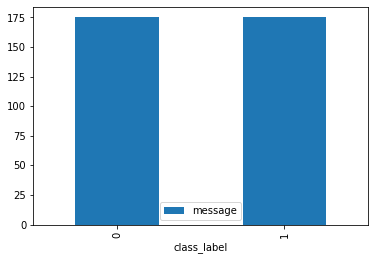

In [23]:
df.groupby('class_label').count().plot.bar()

In [24]:
df['length'] = df['message'].apply(len)
df.head()

,message,class_label,length
0,"Huh, anyway check out this you[tube] channel: ...",1,56
1,Hey guys check out my new channel and our firs...,1,166
2,just for test I have to say murdev.com,1,38
3,me shaking my sexy ass on my channel enjoy ^_^...,1,50
4,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1,41


array([[<AxesSubplot:title={'center':'class_label'}>,
        <AxesSubplot:title={'center':'length'}>]], dtype=object)

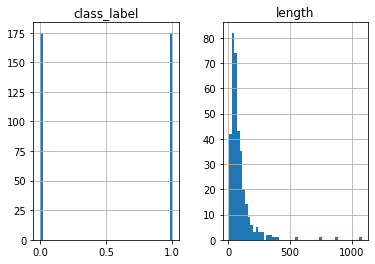

In [37]:
df.hist(bins=50)

In [38]:
data_ham  = df[df['class_label'] == 0].copy()
data_spam = df[df['class_label'] == 1].copy()

def show_wordcloud(df, title):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffa78c",
                                        width = 3000, height = 2000).generate(text)
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

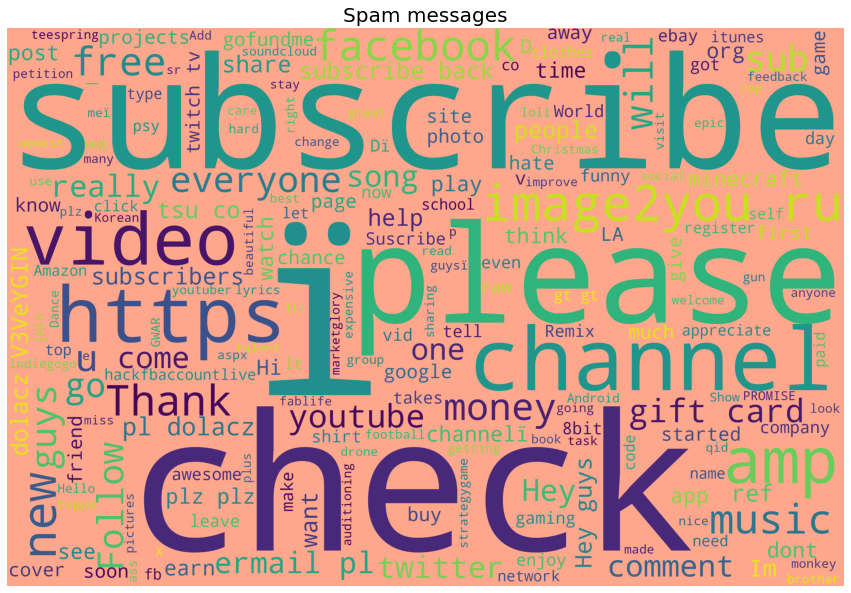

In [39]:
show_wordcloud(data_spam, "Spam messages")

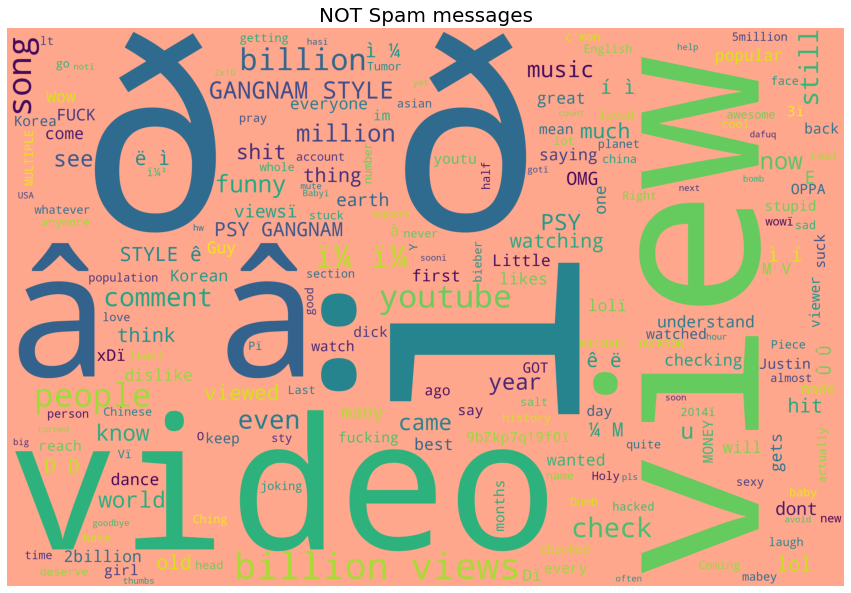

In [40]:
show_wordcloud(data_ham, "NOT Spam messages")